# Sodders Python Homework

## Initial Installations (If not Already Done)

In [1]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [2]:
from Bio import SeqIO
from Bio import Seq
from Bio.Data import CodonTable
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#https://medium.com/@Med1um1/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1

# Part 1

## Functions 

### 1 Describe all functions used below: what it does, returns, and arguments

In [3]:
def get_sequences_from_file(bears_cytb): 
    sequence_data_dict = {}
    for record in SeqIO.parse(bears_cytb.fasta, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [4]:
def get_sequences_from_file(fasta_fn):              #reads the fasta file inputed to the brackets
    sequence_data_dict = {}                         #makes dictionary 
    for record in SeqIO.parse(fasta_fn, "fasta"):   #organize dictionary by sequence name 
        description = record.description.split() 
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)                      #returns the dictionary organized by the sequence name

### 2 Write a Function that Translates Sequences

In [5]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #Check what is in the table
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [6]:
def regular_translate(string_nucleotides):                                   #Define Function and input needs
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string =""                                                        #Put in a string 
    if len(seq)%3 == 0:                                                      #Make codons from groups of three nucleotides
        for i in range(0, len(string_nucleotides), 3):
            codon = seq[i:i + 3]
    if codon in ["AGA", "AGG", "TAA", "TAG"]:                                #Adds function of stop codon, stops reading once one is read
            return aa_seq_string
    aa_seq_string+= mito_table[codon]                                        #Put together and output
    return aa_seq_string
#https://www.geeksforgeeks.org/dna-protein-python-3/

### 3 Write Alternative Translation Function (With BioPython)

In [7]:
def biopython_translate(DNA_nucleotides):                                    #Define function and input needs
    aminoacid_seq = ""                                                       #Make empty string for amino acids to go 
    aminoacid_seq=Seq.translate(DNA_nucleotides, table=2, to_stop=True)      #Makes the codons, stops at stop sequence
    return aminoacid_seq                                                     #Output is an amino acid sequence
#https://biopython.readthedocs.io/en/latest/Tutorial/chapter_seq_objects.html

### 4 Write a Function that Calculates the Molecular Weight of each Amino Acid Sequence.

In [8]:
def molecular_weight_calc(aa_seq):                                           #Define function and input needs 
    aa_string= ProteinAnalysis(aa_seq)                                       #Protien analysis from Biopython
    return aa_string.molecular_weight()                                      #Output is the molecular weight
#https://biopython.org/wiki/ProtParam

### 5 Write a Function that Calculates the GC-content (proportion of "G" and "C") of each DNA Sequence and Returns this Value 

In [9]:
def gc_calc(DNA_nucleotides):                                                #Define function and input. Will be used later in #7
    return GC(DNA_nucleotides)                                               #Output is amount of G and C in sequence
#https://biopython.org/docs/1.75/api/Bio.SeqUtils.html

# Part 2

In [10]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta")             #Import
cytb_seqs                                                           #did it import? 

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA'),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA'),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA'),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA'),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA'),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA'),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA')}

In [11]:
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass #Import
bears_df                                 #did it import?

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


In [12]:
species_list = list(bears_df.species)    #Import
species_list                             #did it import? 

['Ursus spelaeus',
 'Ursus arctos',
 'Ursus thibetanus',
 'Melursus ursinus',
 'Ursus americanus',
 'Helarctos malayanus',
 'Ailuropoda melanoleuca',
 'Tremarctos ornatus',
 'Ursus maritimus']

### 6 Add Two New Columns to the Bears DataFrame: (1) Molecular Weight and (2) GC content.

In [13]:
bears_df_copy = bears_df.copy()                   #Make a copy to ensure you dont mess up original
for index, row in bears_df_copy.iterrows():       #Make column for molecular weight and fill it with NaN
    bears_df_copy['molecular weight']= "NaN"      #Make column for GC content and fill it with NaN
for index, row in bears_df_copy.iterrows():
    bears_df_copy['GC Content']= "NaN"
bears_df_copy                                     #Check that columns were created and filled 

,species,mass,molecular weight,GC Content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


### 7 Write a For-Loop that Translates Each Sequence and also gets Molecular Weight and Computes the GC Content of Each Translated Sequence and Adds those Data to DataFrame

In [14]:
row=0
for i in bears_df_copy.species:
    aa_sequence= biopython_translate(str(cytb_seqs[i]))
    GC_con = gc_calc(str(cytb_seqs[i]))
    mol_weight = molecular_weight_calc(aa_sequence)
    bears_df_copy.loc[row, 'GC Content'] = GC_con
    bears_df_copy.loc[row, 'molecular weight'] = mol_weight
    row += 1
bears_df_copy

,species,mass,molecular weight,GC Content
0,Ursus spelaeus,550.800,42458.7992,43.77193
1,Ursus arctos,203.500,42414.7435,43.77193
2,Ursus thibetanus,99.714,42306.6735,45.614035
3,Melursus ursinus,100.030,42551.99,45.175439
4,Ursus americanus,110.560,42427.7439,43.947368
5,Helarctos malayanus,47.020,42560.891,44.298246
6,Ailuropoda melanoleuca,118.200,42702.1845,40.789474
7,Tremarctos ornatus,140.700,42384.8266,44.385965
8,Ursus maritimus,425.100,42454.7873,44.298246


### 8 Plot a Bar-Chart of the Mass with the x-axes Labeled with Species Names.

Text(0, 0.5, 'mass')

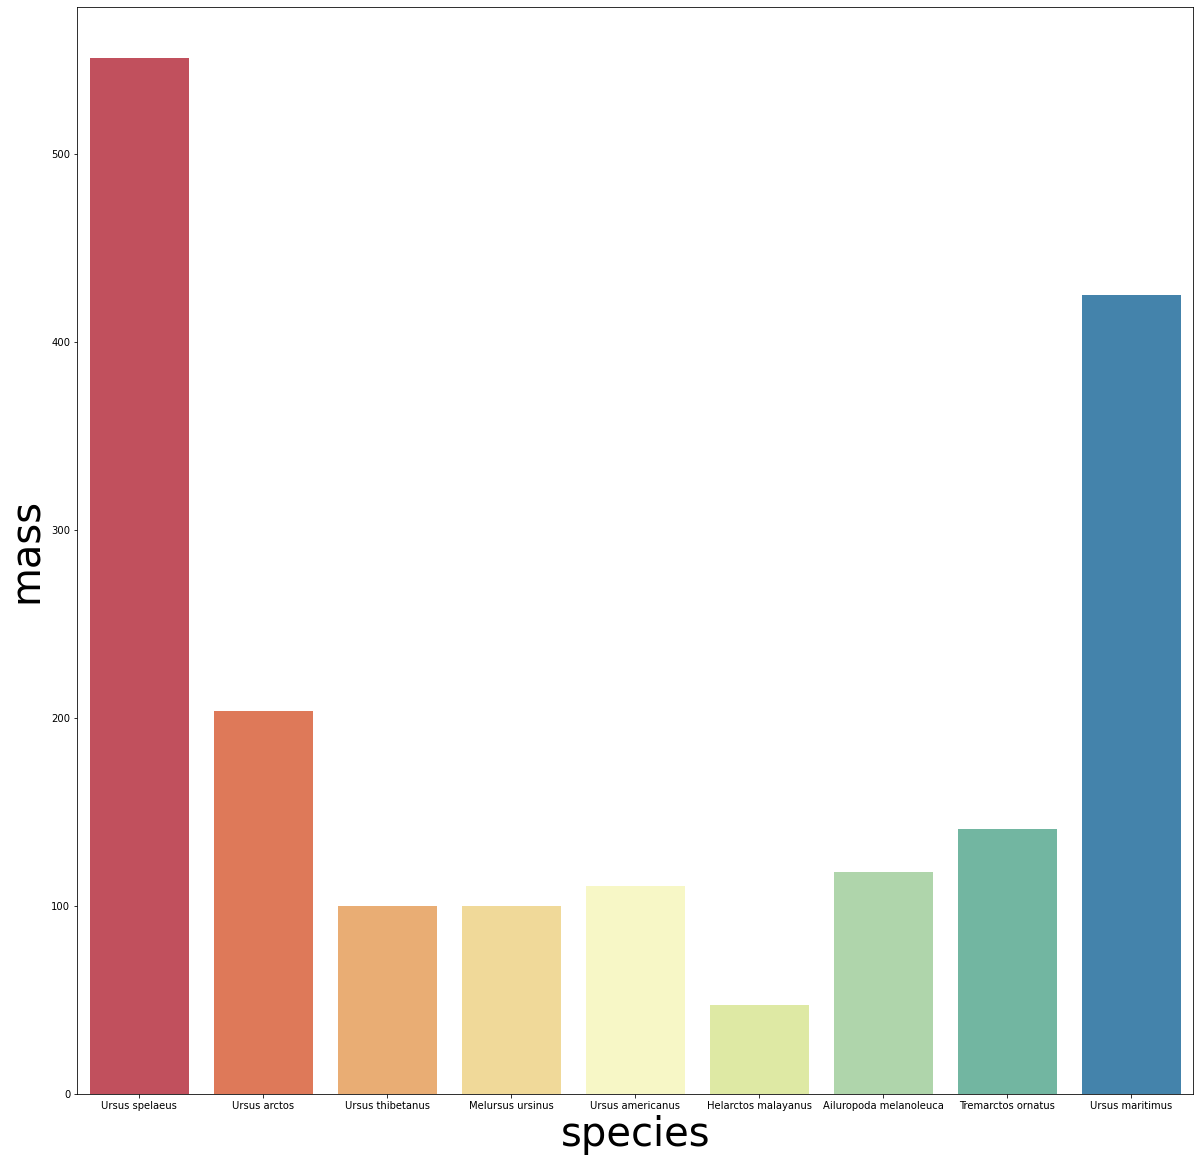

In [15]:
ax= sns.barplot (x= "species", y= "mass", palette ="Spectral", data= bears_df_copy)  #using seaborn, specify what type of bar plot. with data and color palette
ax.figure.set_size_inches(20, 20)                                                    #Set/change plot size as needed
ax.set_xlabel('species', fontsize=40)                                                #label the axes and make font bigger
ax.set_ylabel('mass', fontsize=40) #y axis label and font
#https://seaborn.pydata.org/tutorial/color_palettes.html 

Q1: Ursus speleus 
Q2: They are extinct now
https://www.britannica.com/animal/cave-bear

### 9 Plot a Visualization of the Molecular Weight (y-axis) as a Function of GC-content (x-axis).

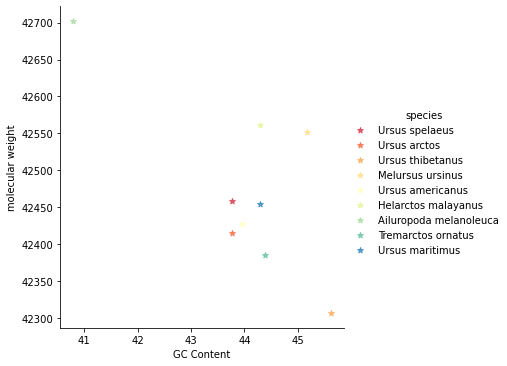

In [16]:
ay= sns.lmplot(x= "GC Content", y= "molecular weight", data= bears_df_copy, markers='*', fit_reg= True, hue="species", aspect=1, palette ="Spectral")

### 10 Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [18]:
bears_df_copy.to_csv('bears_final_sodders.csv')

### 11 Add functions or anything that might be interesting and fun. (optional)